In [4]:
%cd /media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortOptAggregator/

/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortOptAggregator


/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortOptAggregator/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
import pandas as pd
import numpy as np
from itertools import combinations
import time

t_start  = time.perf_counter()
ibov_df  = pd.read_csv('data/raw/IBOV_p.csv',index_col=0)
selic_df = pd.read_csv('data/raw/Selic_p.csv',index_col=0)
df_cotas = pd.read_csv("data/raw/cotas_24M_202201_202312.csv", sep=';', encoding = 'ISO-8859-1', index_col=0)

# Converting the index as date
df_cotas.index = pd.to_datetime(df_cotas.index)
ibov_df.index = pd.to_datetime(ibov_df.index)
selic_df.index = pd.to_datetime(selic_df.index)

In [6]:
df_cotas

,SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS PRÉ-SAL,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES - PETROBRAS 2010,ITAÚ AÇÕES PETROBRÁS - FUNDO DE INVESTIMENTO,SANTANDER FI PETROBRÁS AÇÕES,BB AÇÕES PETROBRAS FUNDO DE INVESTIMENTO,BB AÇÕES PETROBRAS I FUNDO DE INVESTIMENTO,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,BRADESCO H FUNDO DE INVESTIMENTO AÇÕES PETROBRAS,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS,...,SPX FALCON SELEÇÃO AÇÕES FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO,GUEPARDO INSTITUCIONAL FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO DE AÇÕES,ABSOLUTE PACE LONG BIASED ADVISORY FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,REAL INVESTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO EM AÇÕES BDR NÍVEL I,XP INVESTOR DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,ABSOLUTE PACE LONG BIASED FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,PLURAL DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,RPS FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM ACOES SELECTION,XP INVESTOR IBOVESPA ATIVO FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO EM AÇÕES,BB ACOES SETOR FINANCEIRO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO
2022-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-01-04,100.375609,100.374753,100.370475,101.265667,101.096838,100.988479,100.988538,101.202030,101.258973,101.256554,...,99.254519,98.408173,99.223239,98.729238,98.733529,99.228094,100.084111,99.327080,99.629174,100.189652
2022-01-05,96.497169,96.500882,96.491893,97.112908,96.987106,96.929632,96.917683,97.070478,97.109434,97.115852,...,96.944503,95.194621,96.866375,95.784755,96.674423,96.864822,98.604929,96.495908,97.223258,98.350140
2022-01-06,96.427937,96.430493,96.417308,97.016106,96.891018,96.841384,96.823480,96.971785,97.008502,97.015408,...,96.568960,95.742848,97.210533,95.555989,96.639596,97.209622,98.756922,97.204285,97.727422,99.611734
2022-01-07,96.873932,96.872546,96.856908,97.806449,97.613820,97.520619,97.502768,97.734251,97.793180,97.800986,...,97.594931,95.907221,97.582128,95.722491,96.026048,97.579733,99.838485,98.733639,98.577203,101.291772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,262.635912,261.312333,255.453422,238.558239,237.122861,236.939042,236.626165,234.348508,233.623363,233.243985,...,150.826511,148.170406,148.202588,146.096032,147.384793,147.465313,146.758985,145.066009,144.491746,143.051144
2023-12-26,266.686069,265.345066,259.333747,242.222719,240.591623,240.339489,240.029766,237.679038,236.945455,236.606964,...,151.511287,148.728173,148.585577,146.728191,148.059214,147.847019,147.658821,145.558176,145.360233,144.153737
2023-12-27,267.152421,265.792664,259.798048,241.862457,240.582726,240.406039,240.064638,237.592967,236.845368,236.502519,...,152.105247,148.802083,149.237231,147.665217,148.263100,148.496193,148.242064,146.697141,145.836325,144.629721
2023-12-28,266.327210,264.967037,258.982747,240.914487,239.653629,239.528214,239.185191,236.636514,235.900887,235.557430,...,152.252852,149.330837,149.106633,148.853429,148.421660,148.366049,148.285166,146.973958,145.941054,144.977780


In [7]:

df_retorno_fundos = df_cotas-df_cotas.shift(1)
df_retorno_fundos.dropna(inplace=True)
df_retorno_fundos

,SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS PRÉ-SAL,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES - PETROBRAS 2010,ITAÚ AÇÕES PETROBRÁS - FUNDO DE INVESTIMENTO,SANTANDER FI PETROBRÁS AÇÕES,BB AÇÕES PETROBRAS FUNDO DE INVESTIMENTO,BB AÇÕES PETROBRAS I FUNDO DE INVESTIMENTO,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,BRADESCO H FUNDO DE INVESTIMENTO AÇÕES PETROBRAS,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS,...,SPX FALCON SELEÇÃO AÇÕES FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO,GUEPARDO INSTITUCIONAL FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO DE AÇÕES,ABSOLUTE PACE LONG BIASED ADVISORY FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,REAL INVESTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO EM AÇÕES BDR NÍVEL I,XP INVESTOR DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,ABSOLUTE PACE LONG BIASED FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,PLURAL DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,RPS FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM ACOES SELECTION,XP INVESTOR IBOVESPA ATIVO FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO EM AÇÕES,BB ACOES SETOR FINANCEIRO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO
2022-01-04,0.375609,0.374753,0.370475,1.265667,1.096838,0.988479,0.988538,1.202030,1.258973,1.256554,...,-0.745481,-1.591827,-0.776761,-1.270762,-1.266471,-0.771906,0.084111,-0.672920,-0.370826,0.189652
2022-01-05,-3.878441,-3.873871,-3.878582,-4.152759,-4.109732,-4.058847,-4.070855,-4.131552,-4.149539,-4.140703,...,-2.310016,-3.213552,-2.356864,-2.944483,-2.059106,-2.363271,-1.479182,-2.831172,-2.405916,-1.839512
2022-01-06,-0.069232,-0.070388,-0.074584,-0.096801,-0.096088,-0.088249,-0.094202,-0.098693,-0.100932,-0.100444,...,-0.375543,0.548228,0.344158,-0.228767,-0.034827,0.344799,0.151993,0.708377,0.504164,1.261594
2022-01-07,0.445995,0.442053,0.439600,0.790342,0.722802,0.679235,0.679287,0.762466,0.784679,0.785578,...,1.025971,0.164373,0.371595,0.166502,-0.613548,0.370111,1.081563,1.529355,0.849781,1.680038
2022-01-10,-0.582724,-0.584216,-0.588790,-0.350279,-0.398375,-0.426752,-0.426850,-0.369022,-0.353972,-0.353654,...,-0.366710,-1.192732,-0.580387,-0.458007,-0.527771,-0.578999,-0.155093,-0.658964,-0.206693,-0.235543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2.375849,2.359926,2.294061,2.993322,2.829565,2.661642,2.640691,2.927560,2.918869,2.918247,...,0.802637,0.086567,0.268153,0.736383,0.760381,0.267081,0.517505,0.934432,0.749148,1.215175
2023-12-26,4.050157,4.032733,3.880324,3.664480,3.468762,3.400446,3.403602,3.330530,3.322091,3.362979,...,0.684776,0.557767,0.382989,0.632159,0.674420,0.381706,0.899836,0.492167,0.868487,1.102593
2023-12-27,0.466352,0.447598,0.464301,-0.360262,-0.008896,0.066550,0.034871,-0.086071,-0.100086,-0.104445,...,0.593960,0.073910,0.651654,0.937026,0.203887,0.649174,0.583243,1.138965,0.476093,0.475984
2023-12-28,-0.825211,-0.825628,-0.815301,-0.947970,-0.929097,-0.877824,-0.879447,-0.956452,-0.944481,-0.945089,...,0.147605,0.528754,-0.130598,1.188211,0.158560,-0.130144,0.043102,0.276817,0.104728,0.348059


#### 2. Quais foram as datas na qual cada ativo apresentou sua pior oscilação? Apresente também a variação percentual.

In [8]:
df_retorno_fundos.idxmin()

SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS                                                     2022-10-24
FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS PRÉ-SAL                                                 2022-10-24
BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES - PETROBRAS 2010                                               2022-10-24
ITAÚ AÇÕES PETROBRÁS - FUNDO DE INVESTIMENTO                                                           2022-10-24
SANTANDER FI PETROBRÁS AÇÕES                                                                           2022-10-24
BB AÇÕES PETROBRAS FUNDO DE INVESTIMENTO                                                               2022-10-24
BB AÇÕES PETROBRAS I FUNDO DE INVESTIMENTO                                                             2022-10-24
BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS                                                      2022-10-24
BRADESCO H FUNDO DE INVESTIMENTO AÇÕES PETROBRAS                                        

In [9]:
df_retorno_fundos.min()

SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS                                                     -17.565928
FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS PRÉ-SAL                                                 -17.502500
BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES - PETROBRAS 2010                                               -17.414017
ITAÚ AÇÕES PETROBRÁS - FUNDO DE INVESTIMENTO                                                           -18.551985
SANTANDER FI PETROBRÁS AÇÕES                                                                           -18.174300
BB AÇÕES PETROBRAS FUNDO DE INVESTIMENTO                                                               -17.981796
BB AÇÕES PETROBRAS I FUNDO DE INVESTIMENTO                                                             -17.905180
BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS                                                      -18.353970
BRADESCO H FUNDO DE INVESTIMENTO AÇÕES PETROBRAS                                        

In [10]:
selic_df

,Selic anualizada base 252 - %a.a.,Selic %a.d.,Retorno Selic(1M),Retorno Selic(3M),Retorno Selic(6M),Retorno Selic(12M)
Date,,,,,,
1999-12-31,19.04,0.069186,0.000000,0.000000,0.000000,0.000000
2000-01-03,19.04,0.069186,0.000000,0.000000,0.000000,0.000000
2000-01-04,19.04,0.069186,0.207703,0.207703,0.207703,0.207703
2000-01-05,19.05,0.069220,0.277066,0.277066,0.277066,0.277066
2000-01-06,19.07,0.069286,0.346545,0.346545,0.346545,0.346545
...,...,...,...,...,...,...
2024-03-18,11.15,0.041957,0.842501,2.691613,5.743313,12.670357
2024-03-19,11.15,0.041957,0.842501,2.689784,5.735830,12.660413
2024-03-20,11.15,0.041957,0.842501,2.687955,5.728348,12.650469


In [37]:
df_cvm = df_retorno_fundos.groupby([df_retorno_fundos.index.year, df_retorno_fundos.index.month]).sum()
df_cvm

SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS  \
2022 1                                           11.132299    
     2                                            5.638184    
     3                                           -1.887405    
     4                                           -0.802094    
     5                                           12.011974    
     6                                           -8.237480    
     7                                           25.907944    
     8                                           23.868273    
     9                                          -16.276946    
     10                                          -0.003239    
     11                                           1.062904    
     12                                         -10.003624    
2023 1                                            8.697943    
     2                                           -4.810666    
     3                                          -10.331863    
     4                                           17.871733    
     5                                           14.138021    
     6                                           31.906748    
     7                                            9.827148    
     8                                           12.578666    
     9                                           17.414286    
     10                                           0.633915    
     11                                          16.639566    
     12                                           9.350506    

         FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS PRÉ-SAL  \
2022 1                                           11.119443        
     2                                            5.614041        
     3                                           -1.943962        
     4                                           -0.790339        
     5                                           11.835739        
     6                                           -8.196411        
     7                                           25.805075        
     8                                           23.747892        
     9                                          -16.278149        
     10                                          -0.020360        
     11                                           0.988481        
     12                                         -10.073262        
2023 1                                            8.670224        
     2                                           -4.822631        
     3                                          -10.381596        
     4                                           17.821760        
     5                                           13.992882        
     6                                           31.992030        
     7                                            9.717666        
     8                                           12.471501        
     9                                           17.247374        
     10                                           0.605641        
     11                                          16.511607        
     12                                           9.328042        

         BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES - PETROBRAS 2010  \
2022 1                                           11.015914          
     2                                            5.502187          
     3                                           -2.057019          
     4                                           -0.915398          
     5                                           11.581441          
     6                                           -7.956611          
     7                                           25.469329          
     8                                           23.953023          
     9                                          -16.453568          
     10                                          -0.126153         

In [18]:
df_retorno_fundos.groupby([df_retorno_fundos.index.year]).sum()

,SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS PRÉ-SAL,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES - PETROBRAS 2010,ITAÚ AÇÕES PETROBRÁS - FUNDO DE INVESTIMENTO,SANTANDER FI PETROBRÁS AÇÕES,BB AÇÕES PETROBRAS FUNDO DE INVESTIMENTO,BB AÇÕES PETROBRAS I FUNDO DE INVESTIMENTO,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,BRADESCO H FUNDO DE INVESTIMENTO AÇÕES PETROBRAS,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS,...,SPX FALCON SELEÇÃO AÇÕES FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO,GUEPARDO INSTITUCIONAL FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO DE AÇÕES,ABSOLUTE PACE LONG BIASED ADVISORY FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,REAL INVESTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO EM AÇÕES BDR NÍVEL I,XP INVESTOR DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,ABSOLUTE PACE LONG BIASED FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,PLURAL DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,RPS FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM ACOES SELECTION,XP INVESTOR IBOVESPA ATIVO FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO EM AÇÕES,BB ACOES SETOR FINANCEIRO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO
2022,42.410789,41.808189,40.308736,42.449553,40.216656,39.909683,39.403205,41.401693,41.294134,41.436261,...,21.533362,6.207937,16.691797,7.067560,18.889026,16.633420,19.622947,15.058443,15.831501,9.751124
2023,123.916002,123.154500,118.659480,98.458835,99.422377,99.601967,99.765585,95.222110,94.593491,94.107505,...,30.747335,43.118611,32.363147,41.775049,29.527370,31.681059,28.656072,31.911466,30.107625,35.215308


In [17]:
c.sum()

SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS                                                      166.326791
FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS PRÉ-SAL                                                  164.962689
BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES - PETROBRAS 2010                                                158.968216
ITAÚ AÇÕES PETROBRÁS - FUNDO DE INVESTIMENTO                                                            140.908388
SANTANDER FI PETROBRÁS AÇÕES                                                                            139.639033
BB AÇÕES PETROBRAS FUNDO DE INVESTIMENTO                                                                139.511651
BB AÇÕES PETROBRAS I FUNDO DE INVESTIMENTO                                                              139.168791
BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS                                                       136.623802
BRADESCO H FUNDO DE INVESTIMENTO AÇÕES PETROBRAS                                

## Retorno fundos

In [178]:
### Cálculo dos retornos
df_cvm.rolling(1, min_periods=1).sum().iloc[[-1]]
df_cvm.rolling(3, min_periods=3).sum().iloc[[-1]]
df_cvm.rolling(6, min_periods=6).sum().iloc[[-1]]
df_cvm.rolling(12, min_periods=12).sum().iloc[[-1]]
df_cvm.rolling(18, min_periods=18).sum().iloc[[-1]]
df_cvm.rolling(24, min_periods=24).sum().iloc[[-1]]

,,SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS PRÉ-SAL,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES - PETROBRAS 2010,ITAÚ AÇÕES PETROBRÁS - FUNDO DE INVESTIMENTO,SANTANDER FI PETROBRÁS AÇÕES,BB AÇÕES PETROBRAS FUNDO DE INVESTIMENTO,BB AÇÕES PETROBRAS I FUNDO DE INVESTIMENTO,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,BRADESCO H FUNDO DE INVESTIMENTO AÇÕES PETROBRAS,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS,...,SPX FALCON SELEÇÃO AÇÕES FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO,GUEPARDO INSTITUCIONAL FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO DE AÇÕES,ABSOLUTE PACE LONG BIASED ADVISORY FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,REAL INVESTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO EM AÇÕES BDR NÍVEL I,XP INVESTOR DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,ABSOLUTE PACE LONG BIASED FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,PLURAL DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,RPS FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM ACOES SELECTION,XP INVESTOR IBOVESPA ATIVO FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO EM AÇÕES,BB ACOES SETOR FINANCEIRO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO
2023,12,166.326791,164.962689,158.968216,140.908388,139.639033,139.511651,139.168791,136.623802,135.887625,135.543766,...,52.280697,49.326548,49.054944,48.842608,48.416396,48.314479,48.279018,46.969909,45.939126,44.966432


In [ ]:
### Cálculo dos retornos médios
df_cvm.rolling(3, min_periods=3).mean().iloc[[-1]]
df_cvm.rolling(6, min_periods=6).mean().iloc[[-1]]
df_cvm.rolling(12, min_periods=12).mean().iloc[[-1]]
df_cvm.rolling(18, min_periods=18).mean().iloc[[-1]]
df_cvm.rolling(18, min_periods=18).mean().iloc[[-1]]
df_cvm.rolling(24, min_periods=24).mean().iloc[[-1]]

In [173]:
df_cvm.rolling(3, min_periods=3).mean().iloc[[-1]]

,,SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS PRÉ-SAL,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES - PETROBRAS 2010,ITAÚ AÇÕES PETROBRÁS - FUNDO DE INVESTIMENTO,SANTANDER FI PETROBRÁS AÇÕES,BB AÇÕES PETROBRAS FUNDO DE INVESTIMENTO,BB AÇÕES PETROBRAS I FUNDO DE INVESTIMENTO,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,BRADESCO H FUNDO DE INVESTIMENTO AÇÕES PETROBRAS,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS,...,SPX FALCON SELEÇÃO AÇÕES FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO,GUEPARDO INSTITUCIONAL FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO DE AÇÕES,ABSOLUTE PACE LONG BIASED ADVISORY FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,REAL INVESTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO EM AÇÕES BDR NÍVEL I,XP INVESTOR DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,ABSOLUTE PACE LONG BIASED FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,PLURAL DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,RPS FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM ACOES SELECTION,XP INVESTOR IBOVESPA ATIVO FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO EM AÇÕES,BB ACOES SETOR FINANCEIRO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO
2023,12,8.874662,8.815096,8.33736,4.663999,5.093306,5.477056,5.570295,4.450445,4.441392,4.447462,...,4.824648,5.564076,4.298006,6.501914,5.692224,4.251063,5.842485,6.79778,6.17969,8.285383


In [175]:
df_cvm.rolling(3, min_periods=3).std().iloc[[-1]]

,,SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS PRÉ-SAL,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES - PETROBRAS 2010,ITAÚ AÇÕES PETROBRÁS - FUNDO DE INVESTIMENTO,SANTANDER FI PETROBRÁS AÇÕES,BB AÇÕES PETROBRAS FUNDO DE INVESTIMENTO,BB AÇÕES PETROBRAS I FUNDO DE INVESTIMENTO,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,BRADESCO H FUNDO DE INVESTIMENTO AÇÕES PETROBRAS,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS,...,SPX FALCON SELEÇÃO AÇÕES FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO,GUEPARDO INSTITUCIONAL FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO DE AÇÕES,ABSOLUTE PACE LONG BIASED ADVISORY FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,REAL INVESTOR FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO EM AÇÕES BDR NÍVEL I,XP INVESTOR DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,ABSOLUTE PACE LONG BIASED FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,PLURAL DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,RPS FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM ACOES SELECTION,XP INVESTOR IBOVESPA ATIVO FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO EM AÇÕES,BB ACOES SETOR FINANCEIRO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO
2023,12,8.013428,7.96538,7.797701,4.433348,4.806875,4.992868,5.018775,4.359312,4.361593,4.36508,...,5.186564,10.603583,9.071747,8.860367,10.84708,8.995369,8.259362,11.915529,8.240176,11.201441


In [ ]:
volat = pd.DataFrame()

#volat['Desv. 3M']  = df_cvm.rolling(3, min_periods=3).std().iloc[:,[0]]
#volat['Desv. 6M']  = df_cvm.rolling(6, min_periods=6).std().iloc[:,[0]]
#volat['Desv. 12M'] = df_cvm.rolling(12, min_periods=12).std().iloc[:,[0]]
#volat['Desv. 18M'] = df_cvm.rolling(18, min_periods=18).std().iloc[:,[0]]
#volat['Desv. 24M'] = df_cvm.rolling(24, min_periods=24).std().iloc[:,[0]]

<Axes: >

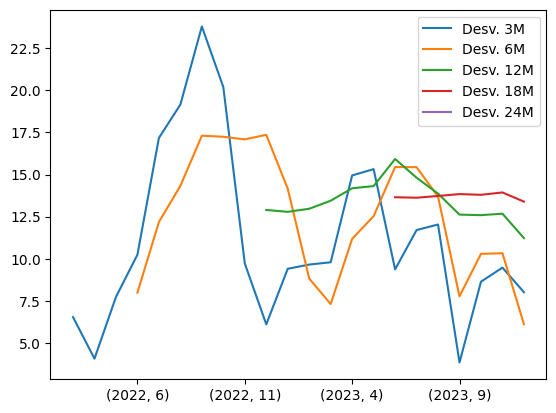

In [172]:
volat.plot()

### Enzo

In [ ]:
fundo1 = pd.read_csv("data/raw/fundo1.csv", sep=',', encoding = 'ISO-8859-1', index_col=0)
fundo1.index = pd.to_datetime(fundo1.index)
fundo1

df_f1_enzo = fundo1.groupby([fundo1.index.year, fundo1.index.month]).sum()
df_f1_enzo
df_f1_cvm = df_cvm.iloc[:,[0]]
df_f1_cvm

df_all = pd.DataFrame()
df_all['Enzo'] = df_f1_enzo.iloc[:,[0]]
df_all['cvm'] = df_f1_cvm.iloc[:,[0]]
df_all['rate'] = df_all['Enzo'] / df_all['cvm']
df_all

df_all.rolling(1, min_periods=1).sum().iloc[[-1]]
df_all.rolling(3, min_periods=1).sum().iloc[[-1]]
df_all.rolling(6, min_periods=1).sum().iloc[[-1]]
df_all.rolling(12, min_periods=1).sum().iloc[[-1]]
df_all.rolling(18, min_periods=1).sum().iloc[[-1]]
df_all.rolling(24, min_periods=1).sum().iloc[[-1]]

In [301]:
num_meses, num_fundos = df_cvm.shape
num_fundos

num_ativos = 4
#Y = cotas.pct_change().dropna()*100

portfolios = list( combinations(range(0, num_fundos), num_ativos) )

# número de portfólio (número de pesos aleatórios gerados)
num_portfolios = len( portfolios )
 
# cria um array para manter os resultados
results0 = np.zeros((num_meses, num_portfolios ))
results1 = np.zeros((num_meses, num_portfolios ))

retorno_portfolios_df = pd.DataFrame()

# cria o for loop para as simulações
for i in range(num_portfolios):
    
    results0[:,i] = (df_cvm.iloc[:, list(portfolios[i])].sum(axis=1)/4.0).values
    results1[:,i] = (df_cvm.iloc[:, list(portfolios[i])].std(axis=1)).values
    
    #df_cvm.iloc[:, list(portfolios[i])].sum(axis=1)/4.0
    
    #retorno_portfolios = pd.concat([retorno_portfolios, (df_cvm.iloc[:, list(portfolios[i])].sum(axis=1)/4.0)], axis=1)
    
#retorno_portfolios[str( list(portfolios[i] ))] = (df_cvm.iloc[:, list(portfolios[i])].sum(axis=1)/4.0)

In [302]:
retorno_portfolios_df = pd.DataFrame(results0, columns = ([str(i)+':'+str(res) for i,res in enumerate(portfolios)]))
desvio_portfolios_df = pd.DataFrame(results1, columns = ([str(i)+':'+str(res) for i,res in enumerate(portfolios)]))

In [303]:
retorno_portfolios_df.index = df_cvm.index
desvio_portfolios_df.index = df_cvm.index

In [304]:
retorno_portfolios_df


0:(0, 1, 2, 3)  1:(0, 1, 2, 4)  2:(0, 1, 2, 5)  3:(0, 1, 2, 6)  \
2022 1        11.269201       11.227480       11.194819       11.190298   
     2         5.041343        5.134806        5.181655        5.189427   
     3        -2.385665       -2.315318       -2.283587       -2.310781   
     4         0.258418        0.020298       -0.097764       -0.094026   
     5        11.608286       11.633508       11.635042       11.616670   
     6        -8.412948       -8.492098       -8.361346       -8.379194   
     7        25.324897       25.369351       25.378400       25.361303   
     8        24.468319       24.191937       24.045607       23.968144   
     9       -16.693784      -16.747397      -16.478131      -16.491177   
     10        0.142677        0.079784        0.033972        0.035299   
     11        1.264275        1.162801        1.125941        1.147285   
     12      -10.140700      -10.079061      -10.265260      -10.250518   
2023 1         8.237768        8.178076        8.209204        8.193018   
     2        -4.476215       -4.605125       -4.608491       -4.603144   
     3       -10.603929      -10.590011      -10.559187      -10.527668   
     4        17.157398       17.130542       17.180955       17.171134   
     5        13.687305       13.644077       13.629201       13.607801   
     6        31.499892       31.674574       31.309165       31.241360   
     7         9.537978        9.488244        9.450838        9.456218   
     8        10.475069       10.720486       10.914037       10.946221   
     9        17.513600       17.306908       17.179134       17.190891   
     10        0.283313        0.277417        0.338689        0.361041   
     11       13.960828       14.259312       14.547737       14.603675   
     12        8.774197        8.803590        8.741706        8.733345   

         4:(0, 1, 2, 7)  5:(0, 1, 2, 8)  6:(0, 1, 2, 9)  7:(0, 1, 2, 10)  \
2022 1        11.238408       11.247500       11.254951        11.253287   
     2         5.062999        5.022740        5.025746         5.023811   
     3        -2.368111       -2.400709       -2.396893        -2.400475   
     4         0.165055        0.239566        0.241554         0.242285   
     5        11.586503       11.571340       11.650531        11.635513   
     6        -8.382426       -8.414560       -8.516114        -8.520627   
     7        25.298470       25.270006       25.302428        25.298018   
     8        24.361481       24.387388       24.292474        24.312093   
     9       -16.640416      -16.658743      -16.614163       -16.619243   
     10        0.108507        0.116850        0.126810         0.128751   
     11        1.204334        1.227948        1.215186         1.199779   
     12      -10.152452      -10.153865      -10.091516       -10.073300   
2023 1         8.161242        8.142357        8.113945         8.112257   
     2        -4.517263       -4.516720       -4.566375        -4.558261   
     3       -10.597582      -10.631444      -10.646096       -10.648039   
     4        17.089129       17.067603       17.053081        17.048201   
     5        13.596104       13.588970       13.571805        13.572635   
     6        31.362315       31.332344       31.324936        31.313969   
     7         9.466271        9.456391        9.463182         9.455501   
     8        10.426942       10.418845       10.411698        10.413771   
     9        17.392692       17.371139       17.377260        17.366347   
     10        0.252413        0.250192        0.252295         0.250339   
     11       13.887497       13.879555       13.868846        13.863878   
     12        8.718263        8.721636        8.734794         8.736544   

         8:(0, 1, 2, 11)  9:(0, 1, 2, 12)  ...  91380:(34, 35, 38, 39)  \
2022 1         11.242646        11.604306  ...               10.619828   
     2          5.016007         6.356870  ...                0.841888   
     3    

In [305]:
desvio_portfolios_df

0:(0, 1, 2, 3)  1:(0, 1, 2, 4)  2:(0, 1, 2, 5)  3:(0, 1, 2, 6)  \
2022 1         0.363715        0.281388        0.217532        0.208765   
     2         1.088535        0.901943        0.808472        0.792970   
     3         0.848674        0.708563        0.645447        0.699534   
     4         2.189449        1.713412        1.477435        1.484907   
     5         0.439923        0.394248        0.391508        0.424620   
     6         0.578967        0.734382        0.478660        0.513224   
     7         0.826602        0.740280        0.722784        0.755863   
     8         1.226738        0.676341        0.387669        0.238819   
     9         0.719925        0.826528        0.295701        0.320829   
     10        0.389004        0.265037        0.176365        0.178891   
     11        0.616100        0.416957        0.345715        0.386854   
     12        0.266410        0.342197        0.265592        0.253210   
2023 1         0.698089        0.815105        0.753991        0.785747   
     2         0.734190        0.476883        0.470172        0.480834   
     3         0.486876        0.459068        0.397494        0.334561   
     4         1.135754        1.188793        1.089286        1.108651   
     5         0.500427        0.578774        0.606245        0.646120   
     6         0.583676        0.319894        0.937917        1.068378   
     7         0.282644        0.363189        0.429032        0.419377   
     8         3.781007        3.291262        2.905277        2.841125   
     9         0.853648        0.492334        0.335704        0.345217   
     10        0.496742        0.508072        0.391653        0.350224   
     11        4.791170        4.195743        3.620863        3.509445   
     12        0.804112        0.748771        0.865817        0.881772   

         4:(0, 1, 2, 7)  5:(0, 1, 2, 8)  6:(0, 1, 2, 9)  7:(0, 1, 2, 10)  \
2022 1         0.302892        0.320822        0.335535         0.332248   
     2         1.045291        1.125689        1.119684         1.123550   
     3         0.813693        0.878662        0.871054         0.878196   
     4         2.002792        2.151759        2.155733         2.157194   
     5         0.480136        0.508456        0.364134         0.390667   
     6         0.519499        0.582116        0.781767         0.790681   
     7         0.878163        0.933860        0.870431         0.879045   
     8         1.013671        1.065314        0.876208         0.915273   
     9         0.614023        0.650359        0.562044         0.572094   
     10        0.321477        0.337935        0.357610         0.361447   
     11        0.498095        0.544487        0.519395         0.489165   
     12        0.256185        0.255074        0.324543         0.350660   
2023 1         0.848225        0.885429        0.941488         0.944820   
     2         0.652213        0.653297        0.554179         0.570371   
     3         0.474193        0.541860        0.571141         0.575026   
     4         1.270691        1.313306        1.342072         1.351740   
     5         0.668067        0.681500        0.713952         0.712380   
     6         0.836800        0.893671        0.907791         0.928731   
     7         0.401486        0.419067        0.406961         0.420660   
     8         3.877080        3.893245        3.907513         3.903374   
     9         0.634622        0.597427        0.607911         0.589266   
     10        0.556339        0.560640        0.556566         0.560356   
     11        4.937510        4.953360        4.974734         4.984649   
     12        0.910621        0.904161        0.879003         0.875663   

         8:(0, 1, 2, 11)  9:(0, 1, 2, 12)  ...  91380:(34, 35, 38, 39)  \
2022 1          0.311246         1.031491  ...                4.316106   
     2          1.139136         1.545268  ...                2.363740   
     3    

In [279]:
### Cálculo dos retornos médios
retorno_portfolios_df.rolling(3, min_periods=3).mean().iloc[[-1]].values
retorno_portfolios_df.rolling(6, min_periods=6).mean().iloc[[-1]].values
retorno_portfolios_df.rolling(12, min_periods=12).mean().iloc[[-1]].values
retorno_portfolios_df.rolling(18, min_periods=18).mean().iloc[[-1]].values
retorno_portfolios_df.rolling(18, min_periods=18).mean().iloc[[-1]].values
retorno_portfolios_df.rolling(24, min_periods=24).mean().iloc[[-1]].values

array([[7.67277944, 7.78010639, 7.87604377, ..., 6.13965522, 6.37847905,
        6.77633449]])

In [312]:
num_meses, num_fundos = df_cvm.shape
num_fundos

num_ativos = 4
#Y = cotas.pct_change().dropna()*100

portfolios = list( combinations(range(0, num_fundos), num_ativos) )

# número de portfólio (número de pesos aleatórios gerados)
num_portfolios = len( portfolios )
 
# cria um array para manter os resultados
results = np.zeros((16, num_portfolios ))

#retorno_portfolios_df = pd.DataFrame()

# cria o for loop para as simulações
#for i in range(num_portfolios):
### Cálculo dos retornos médios
results[0,:] = retorno_portfolios_df.rolling(1, min_periods=1).sum().iloc[[-1]].values
results[1,:] = retorno_portfolios_df.rolling(3, min_periods=3).sum().iloc[[-1]].values
results[2,:] = retorno_portfolios_df.rolling(6, min_periods=6).sum().iloc[[-1]].values
results[3,:] = retorno_portfolios_df.rolling(12, min_periods=12).sum().iloc[[-1]].values
results[4,:] = retorno_portfolios_df.rolling(18, min_periods=18).sum().iloc[[-1]].values
results[5,:] = retorno_portfolios_df.rolling(24, min_periods=24).sum().iloc[[-1]].values

results[6,:] = retorno_portfolios_df.rolling(3, min_periods=3).mean().iloc[[-1]].values
results[7,:] = retorno_portfolios_df.rolling(6, min_periods=6).mean().iloc[[-1]].values
results[8,:] = retorno_portfolios_df.rolling(12, min_periods=12).mean().iloc[[-1]].values
results[9,:] = retorno_portfolios_df.rolling(18, min_periods=18).mean().iloc[[-1]].values
results[10,:] = retorno_portfolios_df.rolling(24, min_periods=24).mean().iloc[[-1]].values

results[11,:] = retorno_portfolios_df.rolling(3, min_periods=3).std().iloc[[-1]].values
results[12,:] = retorno_portfolios_df.rolling(6, min_periods=6).std().iloc[[-1]].values
results[13,:] = retorno_portfolios_df.rolling(12, min_periods=12).std().iloc[[-1]].values
results[14,:] = retorno_portfolios_df.rolling(18, min_periods=18).std().iloc[[-1]].values
results[15,:] = retorno_portfolios_df.rolling(24, min_periods=24).std().iloc[[-1]].values

In [313]:
cl = ['Retorno 1M/%', 'Retorno 3M/%', 'Retorno 6M/%', 'Retorno 12M/%', 'Retorno 18M/%', 'Retorno 24M/%',
      'Retorno M. 3M/%', 'Retorno M. 6M/%', 'Retorno M. 12M/%', 'Retorno M. 18M/%', 'Retorno M. 24M/%',
      'Desvio Padrão 3M/%', 'Desvio Padrão 6M/%', 'Desvio Padrão 12M/%', 'Desvio Padrão 18M/%', 'Desvio Padrão 24M/%']
       
data = pd.DataFrame(results.T, columns = cl)
data.index = retorno_portfolios_df.columns

# https://www.kaggle.com/code/jaakkokivisto/pandas-tutorial-for-finance-bigtech-sharpe-ratios

In [314]:
data

,Retorno 1M/%,Retorno 3M/%,Retorno 6M/%,Retorno 12M/%,Retorno 18M/%,Retorno 24M/%,Retorno M. 3M/%,Retorno M. 6M/%,Retorno M. 12M/%,Retorno M. 18M/%,Retorno M. 24M/%,Desvio Padrão 3M/%,Desvio Padrão 6M/%,Desvio Padrão 12M/%,Desvio Padrão 18M/%,Desvio Padrão 24M/%
"0:(0, 1, 2, 3)",8.774197,23.018338,60.544985,116.047204,140.412887,157.791521,7.672779,10.090831,9.670600,7.800716,6.574647,6.904958,5.804284,11.001876,13.243341,12.164022
"1:(0, 1, 2, 4)",8.803590,23.340319,60.855958,116.288090,140.265505,157.474182,7.780106,10.142660,9.690674,7.792528,6.561424,7.046913,5.799164,11.043773,13.257132,12.181208
"2:(0, 1, 2, 5)",8.741706,23.628131,61.172141,116.332987,140.173517,157.442337,7.876044,10.195357,9.694416,7.787418,6.560097,7.143969,5.797485,10.976319,13.199585,12.128534
"3:(0, 1, 2, 6)",8.733345,23.698061,61.291391,116.373892,140.144227,157.356622,7.899354,10.215232,9.697824,7.785790,6.556526,7.157850,5.802237,10.958811,13.183118,12.116443
"4:(0, 1, 2, 7)",8.718263,22.858173,60.144078,115.238023,139.417947,156.720375,7.619391,10.024013,9.603169,7.745442,6.530016,6.883642,5.777310,10.966597,13.205742,12.128314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"91385:(35, 36, 37, 38)",7.245847,17.303264,17.644562,30.589055,42.128173,47.375633,5.767755,2.940760,2.549088,2.340454,1.973985,9.319559,7.281788,6.387029,5.744224,6.086556
"91386:(35, 36, 37, 39)",7.911981,18.882533,16.561566,31.865976,43.138584,47.132460,6.294178,2.760261,2.655498,2.396588,1.963852,10.060387,8.110209,6.833955,6.229101,6.772794
"91387:(35, 36, 38, 39)",7.191307,18.418966,16.759188,31.415016,41.028663,46.874764,6.139655,2.793198,2.617918,2.279370,1.953115,9.164329,7.384009,6.302593,5.875354,6.403641
"91388:(35, 37, 38, 39)",8.225313,19.135437,17.386774,32.228864,43.004849,46.547487,6.378479,2.897796,2.685739,2.389158,1.939479,10.072756,8.111449,6.903809,6.360077,6.925747


<Axes: >

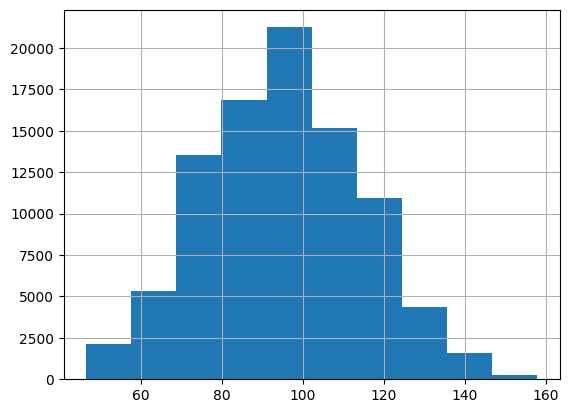

In [311]:
data['Retorno 24M/%'].hist()

In [19]:
fundo1 = pd.read_csv("data/raw/fundo1.csv", sep=',', encoding = 'ISO-8859-1', index_col=0)
fundo1.index = pd.to_datetime(fundo1.index)
fundo1

,SICREDI - FUNDO DE INVESTIMENTO EM ACOES PETROBRAS,Close
2022-01-04,0.375609,100.375609
2022-01-05,-3.863927,96.497169
2022-01-06,-0.071745,96.427937
2022-01-07,0.462517,96.873932
2022-01-10,-0.601528,96.291208
...,...,...
2023-12-22,0.912875,262.635912
2023-12-26,1.542119,266.686069
2023-12-27,0.174869,267.152421
2023-12-28,-0.308891,266.327210


In [38]:
test = fundo1.groupby([df_retorno_fundos.index.year, df_retorno_fundos.index.month])


In [44]:
test.get_group()

ValueError: must supply a tuple to get_group with multiple grouping keys